In [1]:
import json

import requests
from IPython.display import display
from PIL import Image
from rich.console import Console

console = Console()

In [2]:
server_url = "http://localhost:8995/predict"


def display_image(image_path):
    img = Image.open(image_path)
    width, height = img.size

    if width > 400:
        ratio = 400 / width
        new_height = int(height * ratio)
        img = img.resize((400, new_height))
    display(img)


def get_prediction(image_path):
    with open(image_path, "rb") as image_file:
        response = requests.post(server_url, files={"file": image_file})
        return json.loads(response.text)


def demo(image_path):
    console.log(f"Processing image: {image_path}")
    prediction = get_prediction(image_path)
    console.log(f"Prediction: {prediction}")
    display_image(image_path)

[17:27:01] Processing image: sample_image.jpg                                                      ]8;id=776202;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=88915;file:///tmp/ipykernel_600547/1742701463.py#22\22]8;;\

[17:27:03] Prediction: {'license_plates': ['皖A·XH350'], 'processing_time_ms': '1347.38ms',        ]8;id=49735;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=811408;file:///tmp/ipykernel_600547/1742701463.py#24\24]8;;\
           'detection_time_ms': '44.29ms', 'ocr_time_ms': '1303.09ms'}                                             

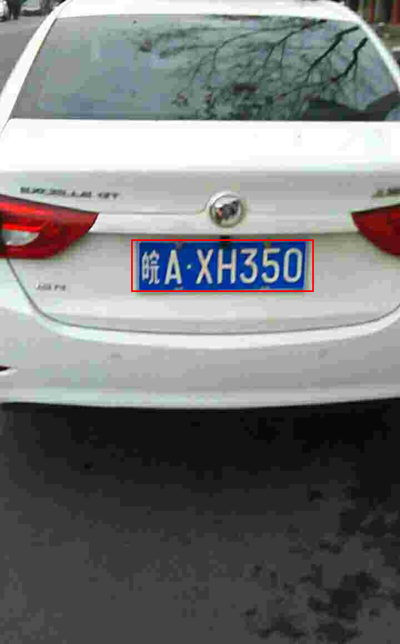

In [3]:
demo("sample_image.jpg")
# expecting ['皖A·XH350']

           Processing image: blurry_image.jpg                                                      ]8;id=819685;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=167818;file:///tmp/ipykernel_600547/1742701463.py#22\22]8;;\

[17:27:04] Prediction: {'license_plates': ['BLAD130W'], 'processing_time_ms': '1244.97ms',         ]8;id=971100;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=346979;file:///tmp/ipykernel_600547/1742701463.py#24\24]8;;\
           'detection_time_ms': '29.01ms', 'ocr_time_ms': '1215.96ms'}                                             

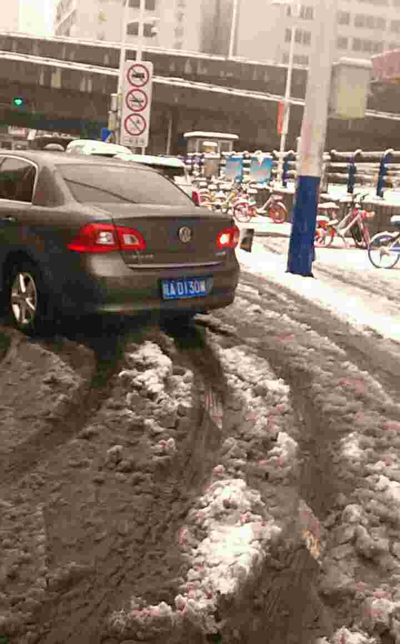

In [4]:
demo("blurry_image.jpg")
# expecting ['?A·D130?']

           Processing image: stitch.jpg                                                            ]8;id=906952;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=791405;file:///tmp/ipykernel_600547/1742701463.py#22\22]8;;\

[17:27:05] Prediction: {'license_plates': ['RA-YL250'], 'processing_time_ms': '1296.05ms',         ]8;id=202723;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=430914;file:///tmp/ipykernel_600547/1742701463.py#24\24]8;;\
           'detection_time_ms': '30.35ms', 'ocr_time_ms': '1265.70ms'}                                             

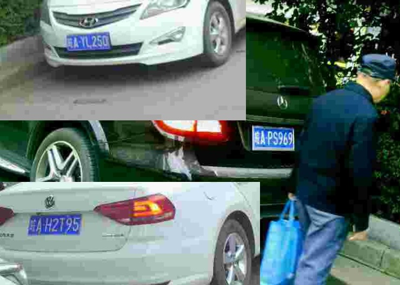

In [5]:
demo("stitch.jpg")
# expecting ['?A·YL250', '?A·PS969', '?A·H2T95']

           Processing image: partial_mask.jpg                                                      ]8;id=992639;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=206030;file:///tmp/ipykernel_600547/1742701463.py#22\22]8;;\

[17:27:07] Prediction: {'license_plates': ['HAH2 95'], 'processing_time_ms': '1263.01ms',          ]8;id=240570;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=523907;file:///tmp/ipykernel_600547/1742701463.py#24\24]8;;\
           'detection_time_ms': '31.95ms', 'ocr_time_ms': '1231.06ms'}                                             

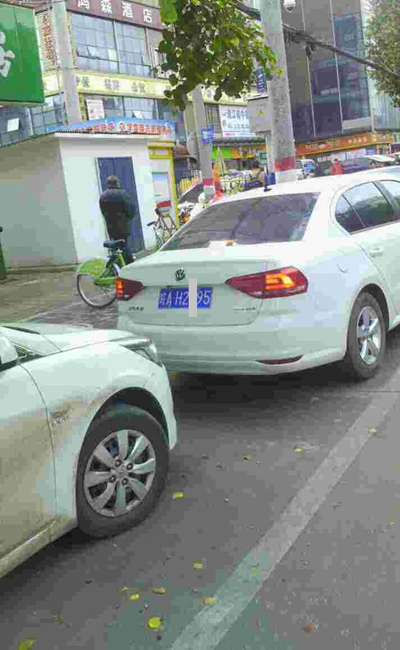

In [6]:
demo("partial_mask.jpg")
# expecting ['?A·H2 95']

           Processing image: full_mask.jpg                                                         ]8;id=450230;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=345316;file:///tmp/ipykernel_600547/1742701463.py#22\22]8;;\

[17:27:08] Prediction: {'license_plates': ['I'], 'processing_time_ms': '1173.20ms',                ]8;id=601484;file:///tmp/ipykernel_600547/1742701463.py\1742701463.py]8;;\:]8;id=166891;file:///tmp/ipykernel_600547/1742701463.py#24\24]8;;\
           'detection_time_ms': '29.90ms', 'ocr_time_ms': '1143.30ms'}                                             

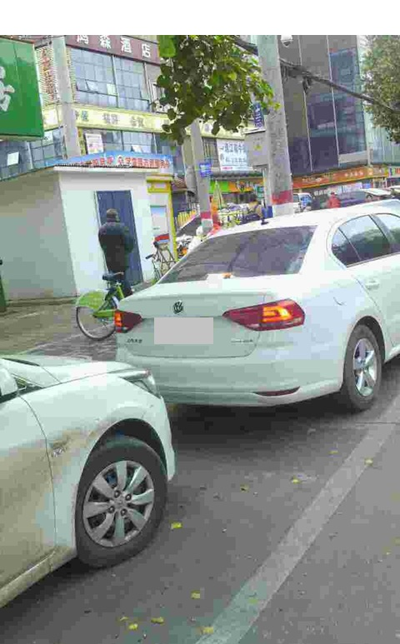

In [7]:
demo("full_mask.jpg")
# expecting ['']